### Chapter 1.3.1 
# Handshaking Protocol 

---
>(c) Tobias Hossfeld  (Aug 2021)<br><br>
> This script and the figures are part of the following book. The book is to be cited whenever the script is used (copyright CC BY-SA 4.0):<br>
> _Tran-Gia, P. & Hossfeld, T. (2021). 
Performance Modeling and Analysis of Communication Networks - A Lecture Note.
Würzburg University Press.
> https://doi.org/10.25972/WUP-978-3-95826-153-2

*

### Chapter 1.3.1 
# Handshaking Protocol 

---
>(c) Tobias Hossfeld  (Aug 2021)<br><br>
> This script and the figures are part of the following book. The book is to be cited whenever the script is used (copyright CC BY-SA 4.0):<br>
> *Tran-Gia, P. & Hossfeld, T. (2021). 
Performance Modeling and Analysis of Communication Networks - A Lecture Note.
Würzburg University Press.*
> *https://doi.org/10.25972/WUP-978-3-95826-153-2*

---

A sender sends messages to a receiver in the form of packets. According to a handshaking protocol, packets received without errors are acknowledged with a positive message (ACK: positive acknowledgment).
If the transmission is incorrect, the recipient sends a negative acknowledgment (NAK: negative acknowledgment), whereupon the sender repeats the transmission of the corresponding packet. The process is repeated until the packet arrives at the receiver without any errors. Then, the next packet can be transmitted from sender to receiver. This simple handshaking protocol only allows a single packet to currently move over the communication channel.

![Illustration of the handshaking protocol](fig1-3-handshaking-illustration.png)

The packet transmission time is indicated by $ T_N $ and the signal propagation delay from sender to receiver and back (round-trip time) is denoted by $\tau $. To model the handshaking protocol, the virtual transmission time $ T_V $ of a packet is determined first. The virtual transmission time is defined as the time actually required for the successful transmission of a packet. Let us assume a packet error probability $ p_B $ for any packet and that the error events are independent of one another. After a single transfer process, the transmission is successful with probability $ 1 - p_B $ and we obtain $ T_V = T_N + \tau $. With probability $ p_B $ the transmission is repeated, and $ T_V $ is increased by the time for a single (re-)transmission $ T_N + \ \tau $.

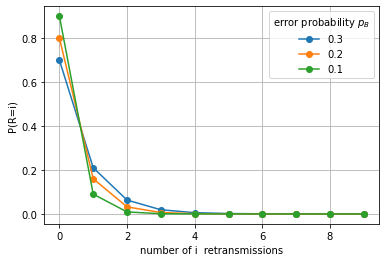

In [8]:
import numpy as np
import matplotlib.pyplot as plt

i = np.arange(10)
for pB in [0.3, 0.2, 0.1]:
    plt.plot(i, pB**i*(1-pB), 'o-', label=pB)
plt.xlabel('number of i  retransmissions')
plt.legend(title='error probability $p_B$')
plt.grid(which='major')
plt.ylabel('P(R=i)');

## Mean Sojourn Time
Now, we consider that the packets are buffered and transmitted in a FIFO manner. We assume that the packets arrive according to a Poisson process with rate $\lambda$. The system is denoted as M/GI/1 delay system. The communication channel is occupied for the virtual transmission time $T_V$ with $R$ indicating the number of retransmissions of a packet. $R$ is a random variable (r.v.). Hence, the virtual transmission time (r.v.) reflects the service time of the system:

$T_V = (R+1)\cdot (T_N+\tau)$

The mean virtual transmission time is

$E[T_V] = \frac{T_N+\tau}{1-p_B}$

and the coefficient of variation of the virtual transmission time is

$c_{T_V} = {\sqrt{p_B}}$

The utilization of the system is 

$\rho = \lambda \cdot E[T_V]$

which must $\rho<1$ for a stable system (otherwise overload).

Then, mean waiting time of the M/GI/1 delay system, see Chapter 5 (Tran-Gia & Hossfeld, 2021):

$E[W] = E[T_V] \frac{\rho(1+c_{T_V}^2)}{2(1-\rho)} = (T_N+\tau) \cdot \frac{1+p_B}{1-p_B} \cdot \frac{\rho}{2(1-\rho)}$

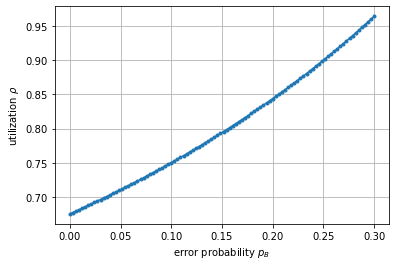

In [43]:
lam = 4.5 # arrival rate of packets [1/s]
tau = 0.05 # round-trip time [s]
TN = 0.1 # transmission time for the packet [s]

pB = np.linspace(0.0, 0.3, 100) # error probability
ETV = (TN+tau)/(1-pB) # mean virtual transmission time
rho = lam*ETV # utilization

plt.plot(pB, rho, '.-')
plt.xlabel('error probability $p_B$')
plt.grid(which='major')
plt.ylabel('utilization $\\rho$');


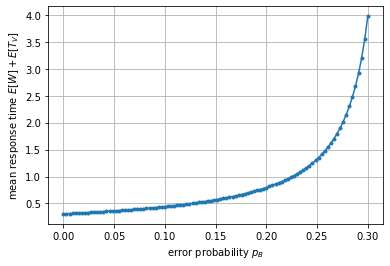

In [44]:
EW = ETV*rho*(1+pB)/(2*(1-rho)) # mean waiting time

plt.plot(pB, EW + ETV, '.-') # mean sojourn time
plt.xlabel('error probability $p_B$')
plt.grid(which='major')
plt.ylabel('mean response time $E[W]+E[T_V]$');
